In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a file path
filepath = "Netflix TV Shows and Movies.csv"

# Read in the data. 
df = pd.read_csv(filepath)

df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [4]:
# Replacing NaN with unknown to clean df
df['age_certification'].fillna('unknown', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  5283 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [6]:
# Dropping nulls with no imbd votes
filtered_df = df.dropna()

In [7]:
selected_col = ["title", "type", "description", "release_year", "age_certification", "imdb_score", "imdb_votes", "runtime"]
clean_df = filtered_df[selected_col].copy()

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5263 entries, 0 to 5282
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5263 non-null   object 
 1   type               5263 non-null   object 
 2   description        5263 non-null   object 
 3   release_year       5263 non-null   int64  
 4   age_certification  5263 non-null   object 
 5   imdb_score         5263 non-null   float64
 6   imdb_votes         5263 non-null   float64
 7   runtime            5263 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 370.1+ KB


In [9]:
clean_df

,title,type,description,release_year,age_certification,imdb_score,imdb_votes,runtime
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,8.3,795222.0,113
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,8.2,530877.0,91
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,8.0,392419.0,94
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,8.1,391942.0,133
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,8.8,72895.0,30
...,...,...,...,...,...,...,...,...
5278,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,unknown,5.8,26.0,108
5279,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,unknown,6.9,39.0,100
5280,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,unknown,6.5,32.0,88
5281,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,unknown,6.2,9.0,116


In [10]:
clean_df.release_year.value_counts()

release_year
2019    746
2018    732
2021    682
2020    653
2017    553
       ... 
1974      1
1959      1
1962      1
1978      1
1985      1
Name: count, Length: 66, dtype: int64

In [11]:
bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ["1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]

clean_df["decade"] = pd.cut (clean_df.release_year, bins, labels=labels, include_lowest=True)

clean_df

,title,type,description,release_year,age_certification,imdb_score,imdb_votes,runtime,decade
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,8.3,795222.0,113,1970s
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,8.2,530877.0,91,1970s
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,8.0,392419.0,94,1970s
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,8.1,391942.0,133,1970s
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,8.8,72895.0,30,1960s
...,...,...,...,...,...,...,...,...,...
5278,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,unknown,5.8,26.0,108,2020s
5279,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,unknown,6.9,39.0,100,2020s
5280,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,unknown,6.5,32.0,88,2020s
5281,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,unknown,6.2,9.0,116,2020s


In [12]:
clean_df.decade.describe()

count      5263
unique        8
top       2010s
freq       3745
Name: decade, dtype: object

C:\Users\mptic\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


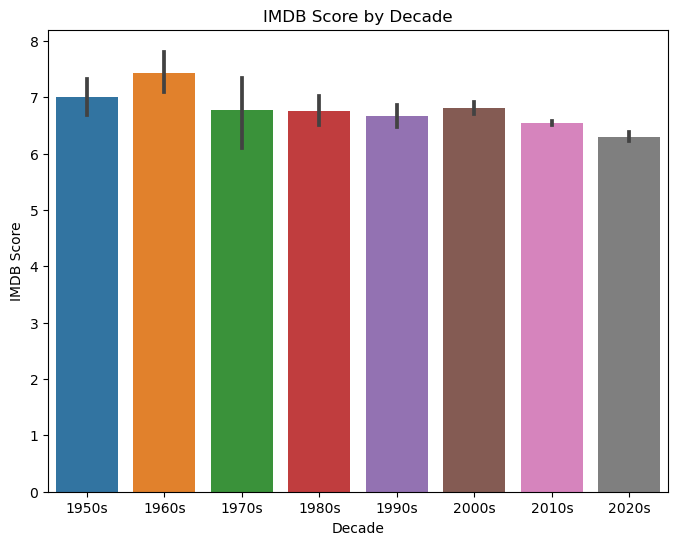

In [13]:
plt.figure(figsize=(8,6))

plt.title("IMDB Score by Decade")

sns.barplot(x=clean_df.decade, y=clean_df.imdb_score)

plt.xlabel("Decade")
plt.ylabel("IMDB Score")
plt.show()

<Axes: xlabel='decade', ylabel='imdb_score'>

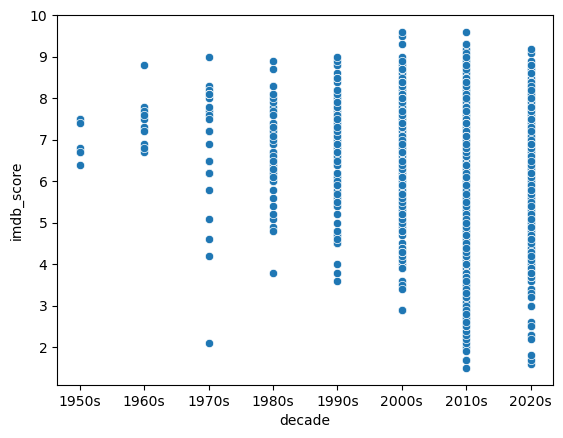

In [14]:
sns.scatterplot(x=clean_df.decade, y=clean_df.imdb_score)

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\4145369005.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_avg_score = clean_df.groupby('decade')['imdb_score'].mean()


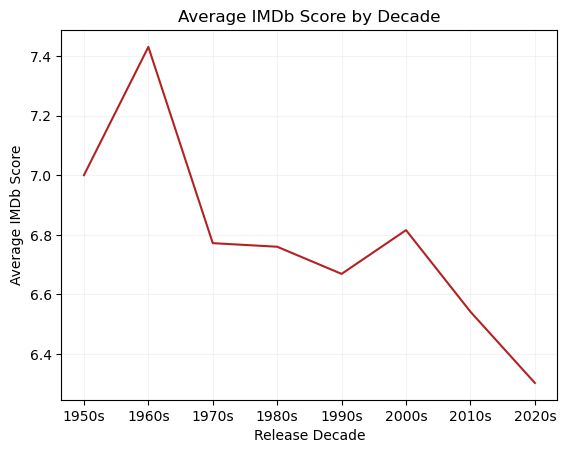

In [15]:

yearly_avg_score = clean_df.groupby('decade')['imdb_score'].mean()
plt.plot(yearly_avg_score.index, yearly_avg_score.values, linestyle='-', marker='', color="firebrick")
plt.xlabel('Release Decade')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score by Decade')
plt.grid(axis='both', alpha=0.25, c='lightgrey')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\1999986321.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_avg_score_movies = movies_df.groupby('decade')['imdb_score'].mean()
C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\1999986321.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_avg_score_shows = tv_shows_df.groupby('decade')['imdb_score'].mean()


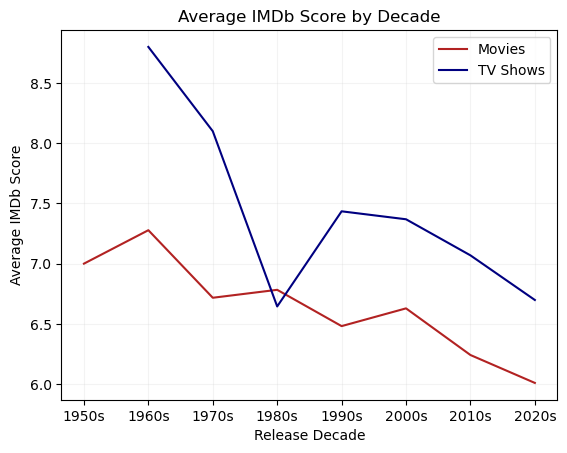

In [16]:
movies_df = clean_df[clean_df['type'] == 'MOVIE']
yearly_avg_score_movies = movies_df.groupby('decade')['imdb_score'].mean()

tv_shows_df = clean_df[clean_df['type'] == 'SHOW']
yearly_avg_score_shows = tv_shows_df.groupby('decade')['imdb_score'].mean()

plt.plot(yearly_avg_score_movies.index, yearly_avg_score_movies.values, linestyle='-', marker='', color="firebrick", label='Movies')
plt.plot(yearly_avg_score_shows.index, yearly_avg_score_shows.values, linestyle='-', marker='', color="navy", label='TV Shows')

plt.xlabel('Release Decade')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score by Decade')
plt.legend()
plt.grid(axis='both', alpha=0.25, c='lightgrey')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\2617479884.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_avg_votes_movies = movies_df.groupby('decade')['imdb_votes'].mean()
C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\2617479884.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_avg_votes_shows = tv_shows_df.groupby('decade')['imdb_votes'].mean()


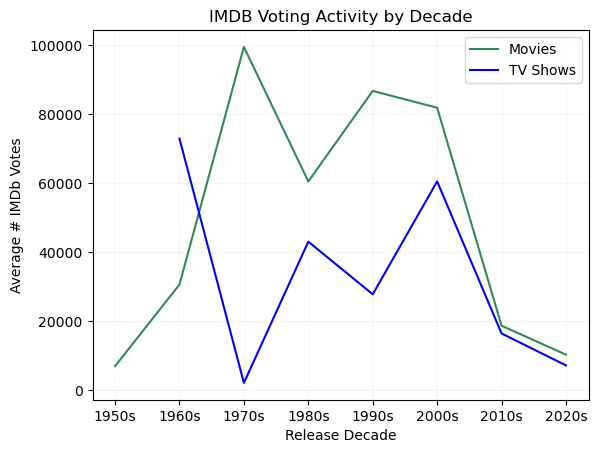

In [17]:
movies_df = clean_df[clean_df['type'] == 'MOVIE']
yearly_avg_votes_movies = movies_df.groupby('decade')['imdb_votes'].mean()

tv_shows_df = clean_df[clean_df['type'] == 'SHOW']
yearly_avg_votes_shows = tv_shows_df.groupby('decade')['imdb_votes'].mean()

plt.plot(yearly_avg_votes_movies.index, yearly_avg_votes_movies.values, linestyle='-', marker='', color="seagreen", label='Movies')
plt.plot(yearly_avg_votes_shows.index, yearly_avg_votes_shows.values, linestyle='-', marker='', color="blue", label='TV Shows')

plt.xlabel('Release Decade')
plt.ylabel('Average # IMDb Votes')
plt.title('IMDB Voting Activity by Decade')
plt.legend()
plt.grid(axis='both', alpha=0.25, c='lightgrey')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\676030979.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_avg_votes_movies = movies_df.groupby('decade')['imdb_votes'].mean()
C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\676030979.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_avg_votes_shows = tv_shows_df.groupby('decade')['imdb_votes'].mean()


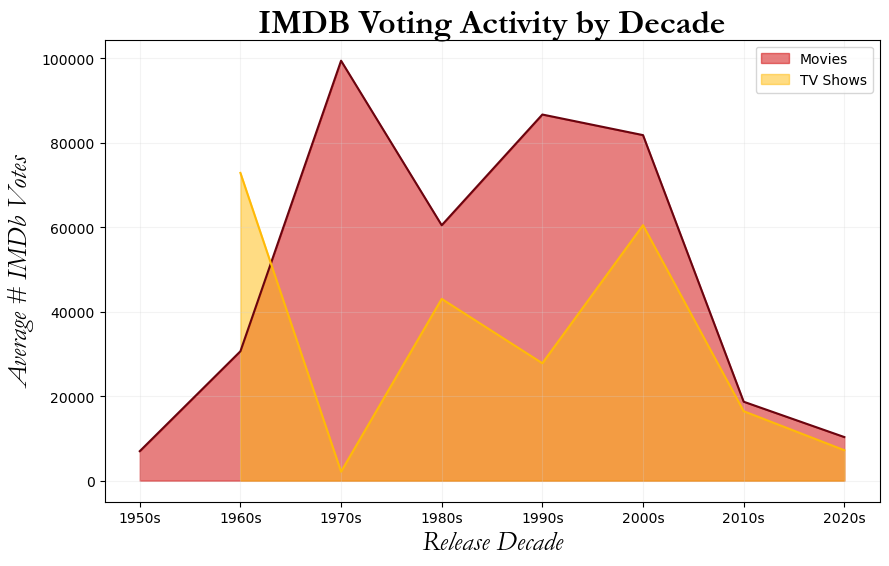

In [43]:
movies_df = clean_df[clean_df['type'] == 'MOVIE']
yearly_avg_votes_movies = movies_df.groupby('decade')['imdb_votes'].mean()

tv_shows_df = clean_df[clean_df['type'] == 'SHOW']
yearly_avg_votes_shows = tv_shows_df.groupby('decade')['imdb_votes'].mean()

plt.figure(figsize=(10, 6))

plt.fill_between(yearly_avg_votes_movies.index, yearly_avg_votes_movies.values, color="#D00000", alpha=0.5, label='Movies')
plt.fill_between(yearly_avg_votes_shows.index, yearly_avg_votes_shows.values, color="#FFBA08", alpha=0.5, label='TV Shows')

plt.plot(yearly_avg_votes_movies.index, yearly_avg_votes_movies.values, color="#6A040F")
plt.plot(yearly_avg_votes_shows.index, yearly_avg_votes_shows.values, color="#FFBA08")

plt.xlabel('Release Decade', fontname = 'Garamond', fontsize=20, style='italic')
plt.ylabel('Average # IMDb Votes', fontname = 'Garamond', fontsize=20, style='italic')
plt.title('IMDB Voting Activity by Decade', fontname = 'Garamond', fontsize=24, fontweight='bold')
plt.legend()
plt.grid(axis='both', alpha=0.25, color='lightgrey')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\1717155169.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_avg_votes = clean_df.groupby('decade')['imdb_votes'].mean()


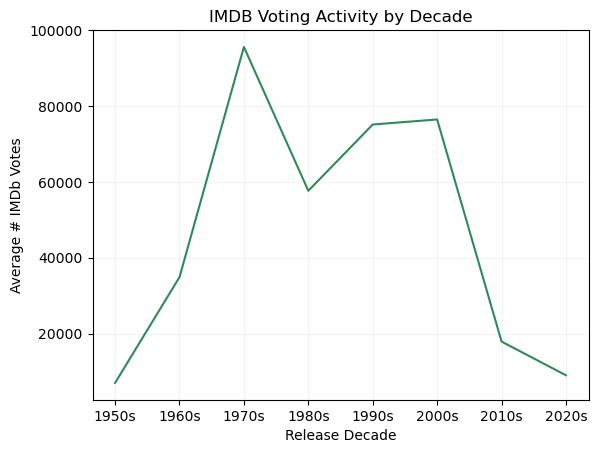

In [19]:
yearly_avg_votes = clean_df.groupby('decade')['imdb_votes'].mean()
plt.plot(yearly_avg_votes.index, yearly_avg_votes.values, linestyle='-', marker='', color="seagreen")
plt.xlabel('Release Decade')
plt.ylabel('Average # IMDb Votes')
plt.title('IMDB Voting Activity by Decade')
plt.grid(axis='both', alpha=0.25, c='lightgrey')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\1717155169.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_avg_votes = clean_df.groupby('decade')['imdb_votes'].mean()


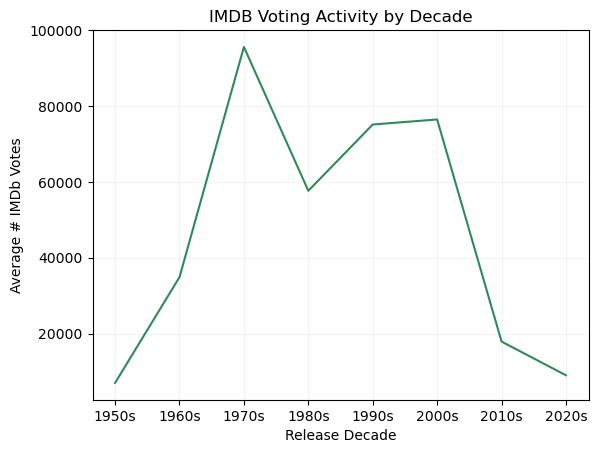

In [20]:
yearly_avg_votes = clean_df.groupby('decade')['imdb_votes'].mean()
plt.plot(yearly_avg_votes.index, yearly_avg_votes.values, linestyle='-', marker='', color="seagreen")
plt.xlabel('Release Decade')
plt.ylabel('Average # IMDb Votes')
plt.title('IMDB Voting Activity by Decade')
plt.grid(axis='both', alpha=0.25, c='lightgrey')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\3195091547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_runtime_by_decade = clean_df.groupby('decade')['runtime'].mean()


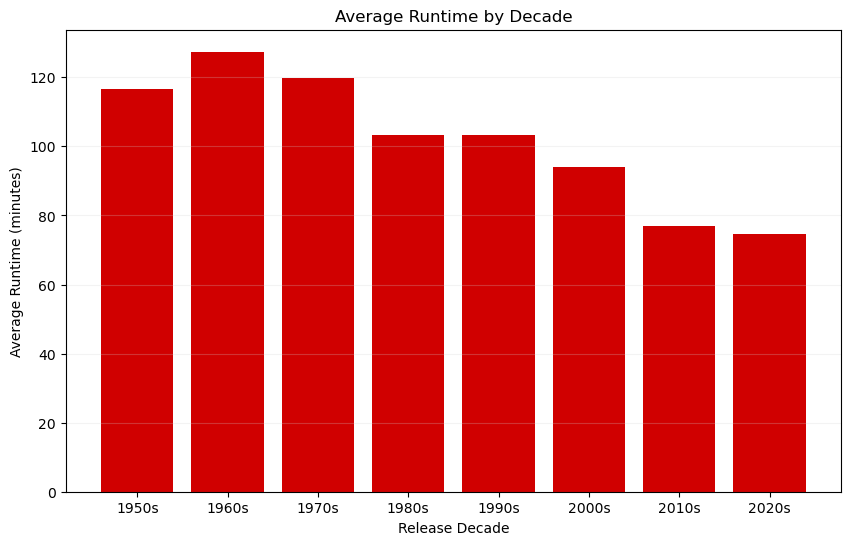

In [21]:
avg_runtime_by_decade = clean_df.groupby('decade')['runtime'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_runtime_by_decade.index, avg_runtime_by_decade.values, color='#D00000')
plt.xlabel('Release Decade')
plt.ylabel('Average Runtime (minutes)')
plt.title('Average Runtime by Decade')
plt.grid(axis='y', alpha=0.25, c='lightgrey')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\3761776812.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_movie_releases = movies_df.groupby('decade')['title'].count()
C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\3761776812.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_tv_releases = tv_shows_df.groupby('decade')['title'].count()


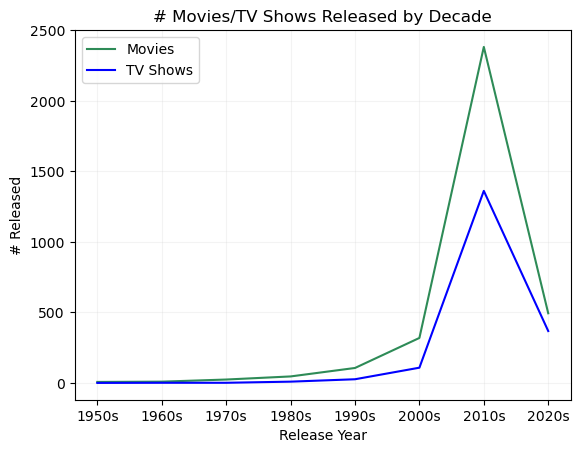

In [22]:
movies_df = clean_df[clean_df['type'] == 'MOVIE']
yearly_movie_releases = movies_df.groupby('decade')['title'].count()

tv_shows_df = clean_df[clean_df['type'] == 'SHOW']
yearly_tv_releases = tv_shows_df.groupby('decade')['title'].count()

plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, linestyle='-', marker='', color="seagreen", label='Movies')
plt.plot(yearly_tv_releases.index, yearly_tv_releases.values, linestyle='-', marker='', color="blue", label='TV Shows')

plt.xlabel('Release Year')
plt.ylabel('# Released')
plt.title('# Movies/TV Shows Released by Decade')
plt.legend()
plt.grid(axis='both', alpha=0.25, c='lightgrey')
plt.show()

C:\Users\mptic\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


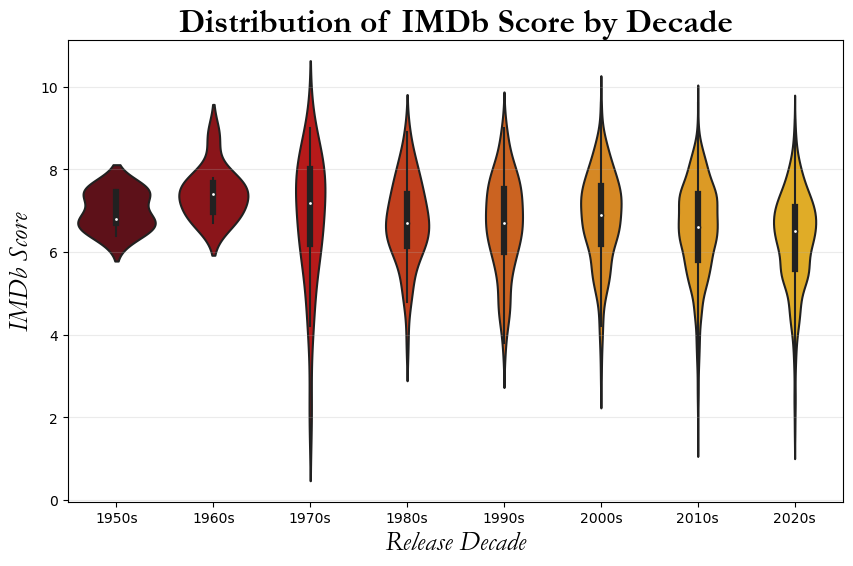

In [23]:
palette = {
    '1930s': '#03071E', 
    '1940s': '#370617', 
    '1950s': '#6A040F', 
    '1960s': '#9D0208', 
    '1970s': '#D00000', 
    '1980s': '#DC2F02', 
    '1990s': '#E85D04', 
    '2000s': '#F48C06', 
    '2010s': '#FAA307', 
    '2020s': '#FFBA08'
}

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='decade', y='imdb_score', data=clean_df, palette=palette, split=True)
plt.xlabel('Release Decade', fontname = 'Garamond', fontsize=20, style='italic')
plt.ylabel('IMDb Score', fontname = 'Garamond', fontsize=20, style='italic')
plt.title('Distribution of IMDb Score by Decade', fontname = 'Garamond', fontsize=24, fontweight='bold')
plt.grid(axis='y', alpha=0.25)
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\4142537353.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_movie_releases = movies_df.groupby('decade')['title'].count()
C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\4142537353.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_tv_releases = tv_shows_df.groupby('decade')['title'].count()


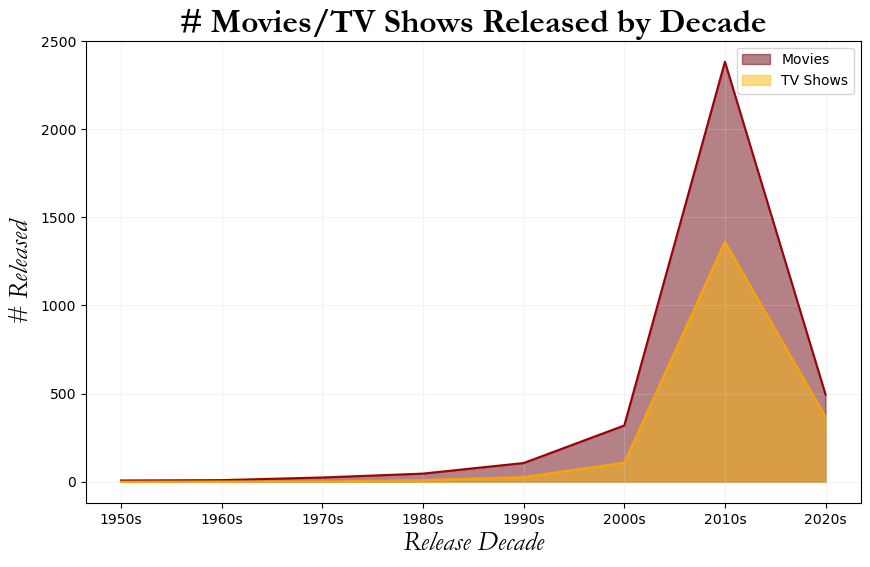

In [47]:
# Filter and group the data
movies_df = clean_df[clean_df['type'] == 'MOVIE']
yearly_movie_releases = movies_df.groupby('decade')['title'].count()

tv_shows_df = clean_df[clean_df['type'] == 'SHOW']
yearly_tv_releases = tv_shows_df.groupby('decade')['title'].count()

# Plot the area chart
plt.figure(figsize=(10, 6))

plt.fill_between(yearly_movie_releases.index, yearly_movie_releases.values, color="#6A040F", alpha=0.5, label='Movies')
plt.fill_between(yearly_tv_releases.index, yearly_tv_releases.values, color="#FFBA08", alpha=0.5, label='TV Shows')

plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, color="#9D0208")
plt.plot(yearly_tv_releases.index, yearly_tv_releases.values, color="#FAA307")

plt.xlabel('Release Decade', fontname = 'Garamond', fontsize=20, style='italic')
plt.ylabel('# Released', fontname = 'Garamond', fontsize=20, style='italic')
plt.title('# Movies/TV Shows Released by Decade', fontname = 'Garamond', fontsize=24, fontweight='bold')
plt.legend()
plt.grid(axis='both', alpha=0.25, color='lightgrey')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\912454567.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_votes_by_decade = clean_df.groupby('decade')['imdb_votes'].mean()


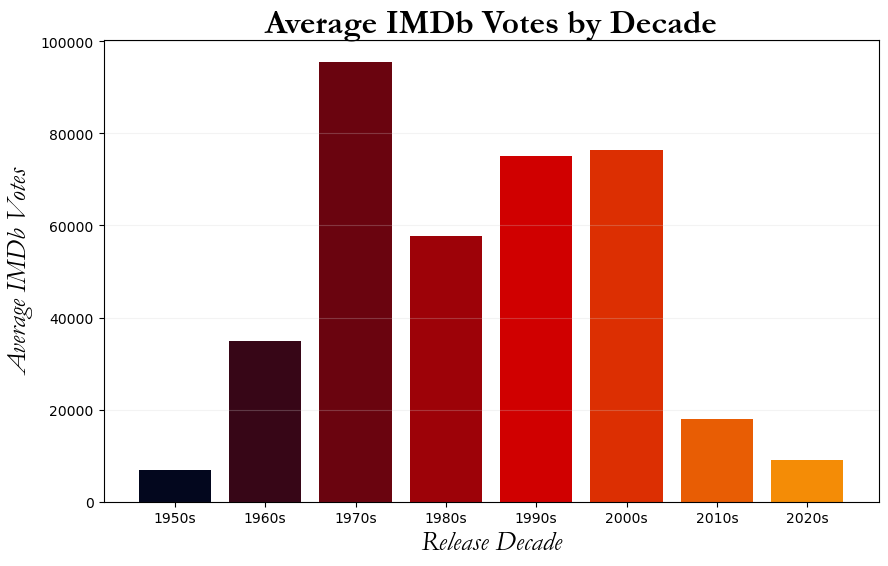

In [25]:
avg_votes_by_decade = clean_df.groupby('decade')['imdb_votes'].mean()

colors = ['#03071E', '#370617', '#6A040F', '#9D0208', '#D00000', '#DC2F02', '#E85D04', '#F48C06', '#FAA307', '#FFBA08']

plt.figure(figsize=(10, 6))
plt.bar(avg_votes_by_decade.index, avg_votes_by_decade.values, color=colors)
plt.xlabel('Release Decade', fontname = 'Garamond', fontsize=20, style='italic')
plt.ylabel('Average IMDb Votes', fontname = 'Garamond', fontsize=20, style='italic')
plt.title('Average IMDb Votes by Decade', fontname = 'Garamond', fontsize=24, fontweight='bold')
plt.grid(axis='y', alpha=0.25, color='lightgrey')
plt.show()

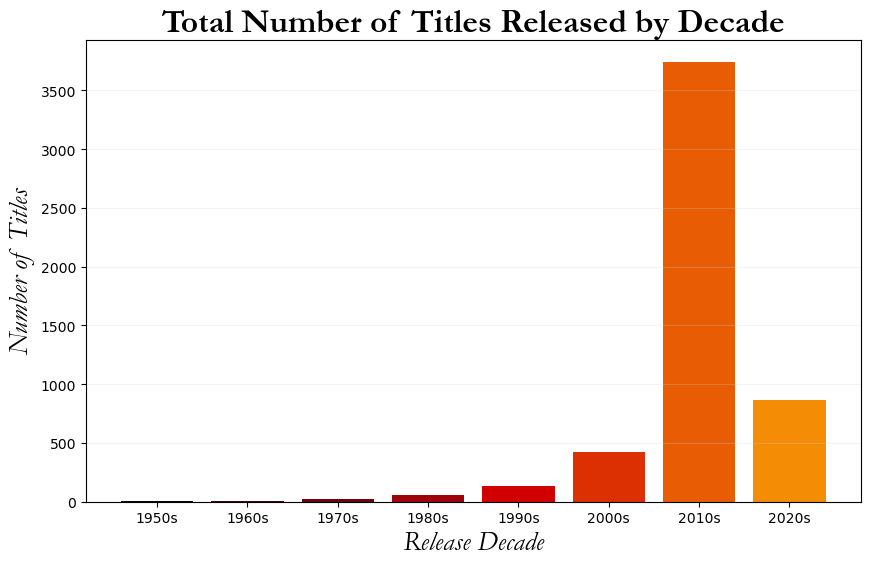

In [26]:
# Count of titles by decade
count_by_decade = clean_df['decade'].value_counts().sort_index()

colors = ['#03071E', '#370617', '#6A040F', '#9D0208', '#D00000', '#DC2F02', '#E85D04', '#F48C06', '#FAA307', '#FFBA08']


plt.figure(figsize=(10, 6))
plt.bar(count_by_decade.index, count_by_decade.values, color=colors)
plt.xlabel('Release Decade', fontname = 'Garamond', fontsize=20, style='italic')
plt.ylabel('Number of Titles', fontname = 'Garamond', fontsize=20, style='italic')
plt.title('Total Number of Titles Released by Decade', fontname = 'Garamond', fontsize=24, fontweight='bold')
plt.grid(axis='y', alpha=0.25, color='lightgrey')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\3047980565.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cert_by_decade = filtered_df.groupby(['decade', 'age_certification']).size().unstack(fill_value=0)


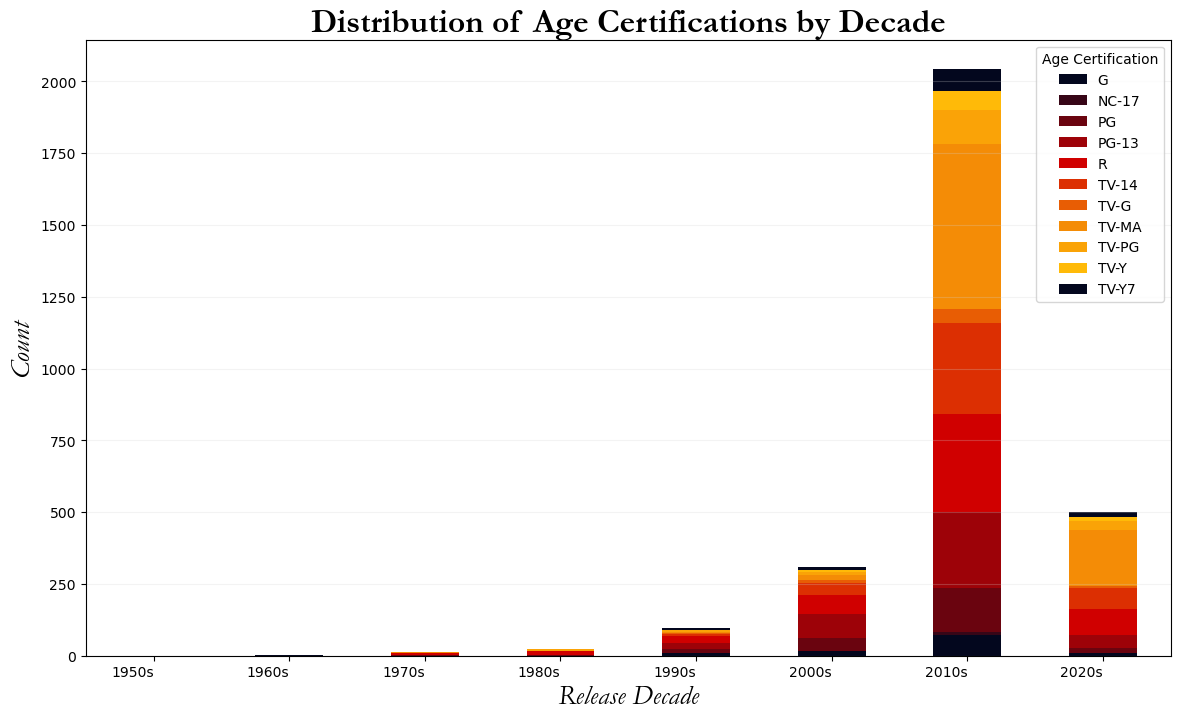

In [42]:
filtered_df = clean_df[clean_df['age_certification'] != 'unknown']
age_cert_by_decade = filtered_df.groupby(['decade', 'age_certification']).size().unstack(fill_value=0)
age_cert_by_decade.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)
plt.xlabel('Release Decade', fontname = 'Garamond', fontsize=20, style='italic')
plt.xticks(rotation=0, ha='right')
plt.ylabel('Count', fontname = 'Garamond', fontsize=20, style='italic')
plt.title('Distribution of Age Certifications by Decade', fontname = 'Garamond', fontsize=24, fontweight='bold')
plt.grid(axis='y', alpha=0.25, color='lightgrey')
plt.legend(title='Age Certification')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\385888628.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_runtime_by_decade = clean_df.groupby('decade')['runtime'].mean()


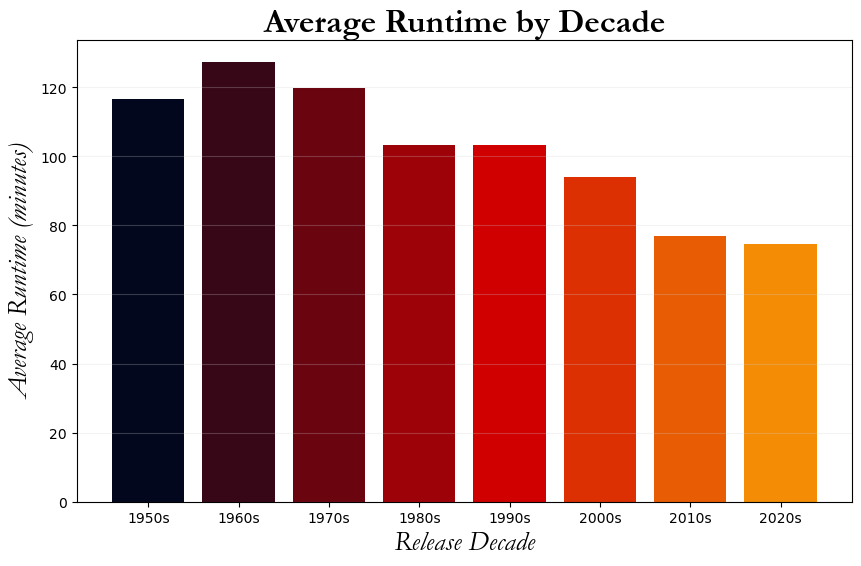

In [28]:
avg_runtime_by_decade = clean_df.groupby('decade')['runtime'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_runtime_by_decade.index, avg_runtime_by_decade.values, color=colors)
plt.xlabel('Release Decade', fontname = 'Garamond', fontsize=20, style='italic')
plt.ylabel('Average Runtime (minutes)', fontname = 'Garamond', fontsize=20, style='italic')
plt.title('Average Runtime by Decade', fontname = 'Garamond', fontsize=24, fontweight='bold')
plt.grid(axis='y', alpha=0.25, color='lightgrey')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\2502334992.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_runtime_by_decade_movies = movies_df.groupby('decade')['runtime'].mean()


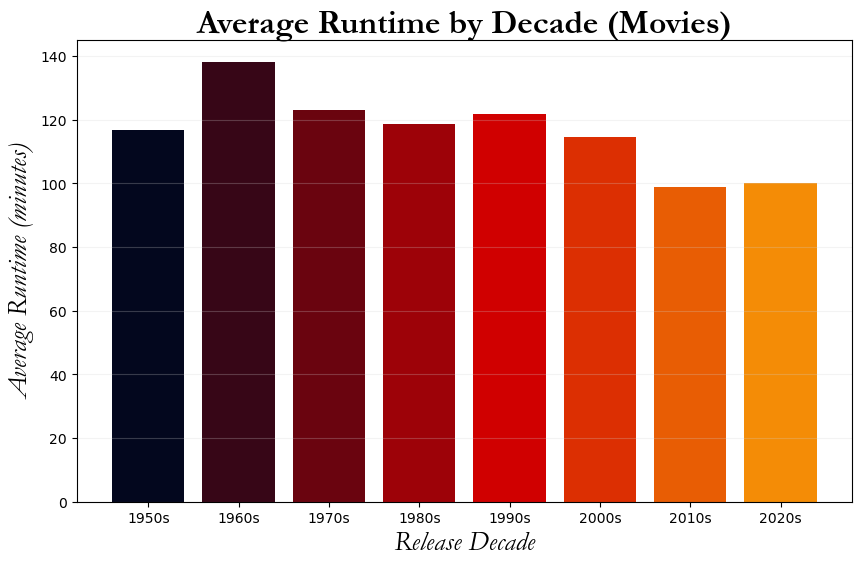

In [34]:
avg_runtime_by_decade_movies = movies_df.groupby('decade')['runtime'].mean()
plt.figure(figsize=(10, 6))
plt.bar(avg_runtime_by_decade_movies.index, avg_runtime_by_decade_movies.values, color=colors)
plt.xlabel('Release Decade', fontname = 'Garamond', fontsize=20, style='italic')
plt.ylabel('Average Runtime (minutes)', fontname = 'Garamond', fontsize=20, style='italic')
plt.title('Average Runtime by Decade (Movies)', fontname = 'Garamond', fontsize=24, fontweight='bold')
plt.grid(axis='y', alpha=0.25, color='lightgrey')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\2383454055.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_runtime_by_decade_tv_shows = tv_shows_df.groupby('decade')['runtime'].mean()


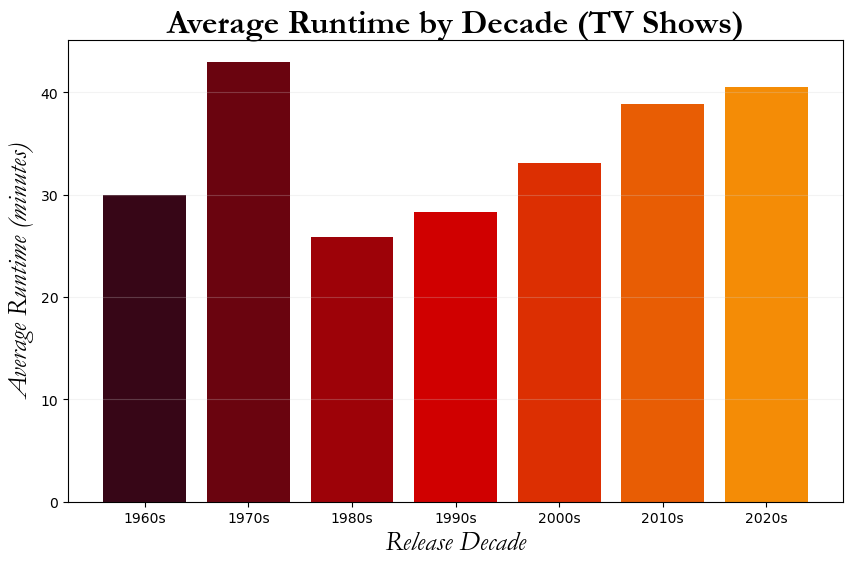

In [33]:
avg_runtime_by_decade_tv_shows = tv_shows_df.groupby('decade')['runtime'].mean()
plt.figure(figsize=(10, 6))
plt.bar(avg_runtime_by_decade_tv_shows.index, avg_runtime_by_decade_tv_shows.values, color=colors)
plt.xlabel('Release Decade', fontname = 'Garamond', fontsize=20, style='italic')
plt.ylabel('Average Runtime (minutes)', fontname = 'Garamond', fontsize=20, style='italic')
plt.title('Average Runtime by Decade (TV Shows)', fontname = 'Garamond', fontsize=24, fontweight='bold')
plt.grid(axis='y', alpha=0.25, color='lightgrey')
plt.show()

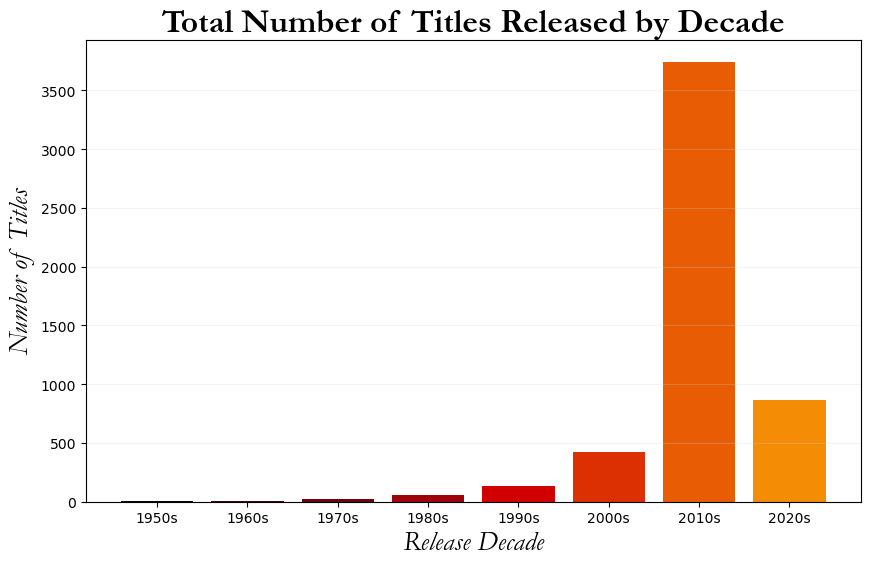

In [31]:
count_by_decade = clean_df['decade'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(count_by_decade.index, count_by_decade.values, color=colors)
plt.xlabel('Release Decade', fontname = 'Garamond', fontsize=20, style='italic')
plt.ylabel('Number of Titles', fontname = 'Garamond', fontsize=20, style='italic')
plt.title('Total Number of Titles Released by Decade', fontname = 'Garamond', fontsize=24, fontweight='bold')
plt.grid(axis='y', alpha=0.25, color='lightgrey')
plt.show()

C:\Users\mptic\AppData\Local\Temp\ipykernel_15588\2965489339.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_by_decade = clean_df.groupby('decade')['imdb_score'].mean()


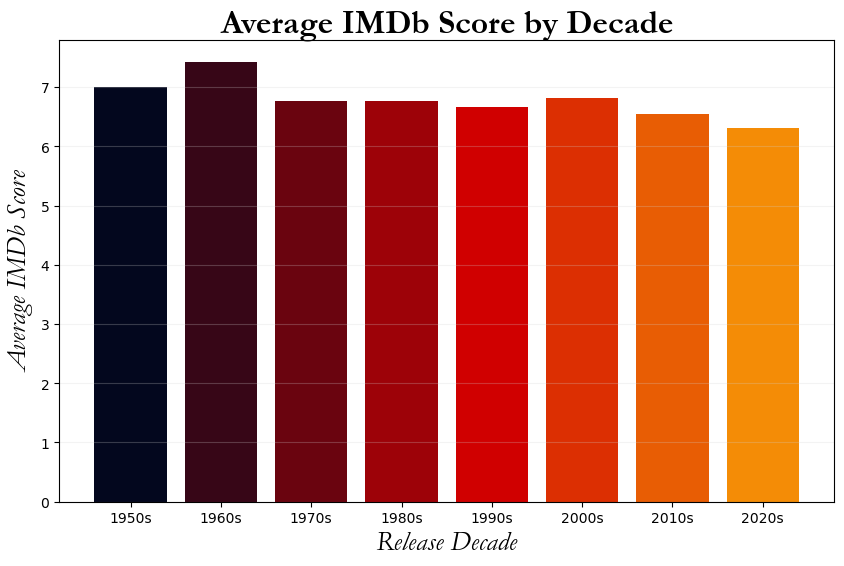

In [32]:
avg_score_by_decade = clean_df.groupby('decade')['imdb_score'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_score_by_decade.index, avg_score_by_decade.values, color=colors)
plt.xlabel('Release Decade', fontname = 'Garamond', fontsize=20, style='italic')
plt.ylabel('Average IMDb Score', fontname = 'Garamond', fontsize=20, style='italic')
plt.title('Average IMDb Score by Decade', fontname = 'Garamond', fontsize=24, fontweight='bold')
plt.grid(axis='y', alpha=0.25, color='lightgrey')
plt.show()